In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

%config InlineBackend.figure_format = 'retina'

### Importing Data

In [4]:
circuits = pd.read_csv('./data/circuits.csv')
constructor_results = pd.read_csv('./data/constructor_results.csv')
constructor_standings = pd.read_csv('./data/constructor_standings.csv')
constructors = pd.read_csv('./data/constructors.csv')
driver_standings = pd.read_csv('./data/driver_standings.csv')
drivers = pd.read_csv('./data/drivers.csv')
lap_times = pd.read_csv('./data/lap_times.csv')
pit_stops = pd.read_csv('./data/pit_stops.csv')
qualifying = pd.read_csv('./data/qualifying.csv')
races = pd.read_csv('./data/races.csv')
results = pd.read_csv('./data/results.csv')
seasons = pd.read_csv('./data/seasons.csv')
sprint_results = pd.read_csv('./data/sprint_results.csv')
status = pd.read_csv('./data/status.csv')

### Looking at csv

We now look at each file one by one and see what data we have and what insights we can derive from it.

#### Circuits

This dataframe contains circuit details

In [7]:
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [8]:
print(f'Total F1 circuits - {circuits.shape[0]}')

Total F1 circuits - 76


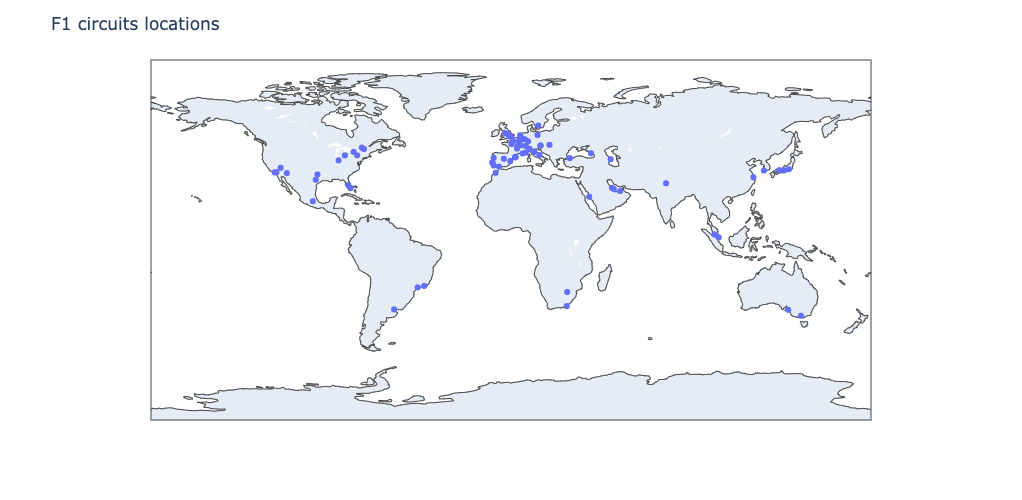

In [17]:
fig2 = fig = px.scatter_geo(circuits, lat=circuits.lat, lon=circuits.lng, 
                            hover_name=circuits.name, width=1000, height=500)
fig2.update_layout(
    title = 'F1 circuits locations',
    geo_scope='world',
)

#### Constructor Standings

These dataframe has team standings for constructor championships.

In [18]:
constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [19]:
constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [20]:
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [24]:
df = pd.merge(constructors, constructor_standings, how='inner', on='constructorId')
df = pd.merge(df, constructor_results, how='inner', on='constructorId')
df.head()

,constructorId,constructorRef,name,nationality,url,constructorStandingsId,raceId_x,points_x,position,positionText,wins,constructorResultsId,raceId_y,points_y,status
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,1,18,14.0,1,1,1,1,18,14.0,\N
1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,1,18,14.0,1,1,1,14,19,10.0,\N
2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,1,18,14.0,1,1,1,25,20,4.0,\N
3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,1,18,14.0,1,1,1,35,21,6.0,\N
4,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,1,18,14.0,1,1,1,46,22,8.0,\N
